# Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from forecast_SN_GW import get_hubblefit

# Load data

In [2]:
data_path = '../'

In [3]:
d_ps1 = pd.read_csv(data_path+'Data/SN_ps_snls_sdss_hst.csv', sep=' ', index_col='CID')
ps1_pd = d_ps1[d_ps1['IDSURVEY'] == 15]

d_X = pd.read_csv(data_path+'Data/jla_lcparams.txt', sep=' ', index_col='#name')

bias_data = fits.getdata(data_path+'Data/covmat/C_bias.fits')
cal_data = fits.getdata(data_path+'Data/covmat/C_cal.fits')
dust_data = fits.getdata(data_path+'Data/covmat/C_dust.fits')
host_data = fits.getdata(data_path+'Data/covmat/C_host.fits')
model_data = fits.getdata(data_path+'Data/covmat/C_model.fits')
nonia_data = fits.getdata(data_path+'Data/covmat/C_nonia.fits')
pecvel_data = fits.getdata(data_path+'Data/covmat/C_pecvel.fits')
stat_data = fits.getdata(data_path+'Data/covmat/C_stat.fits')
covX = bias_data + cal_data + dust_data + host_data + model_data + nonia_data + pecvel_data + stat_data

# Reproduce JLA results

## Build data array for JLA fit

In [4]:
mass = np.zeros_like(d_X['3rdvar'].values)
for i, m in enumerate(d_X['3rdvar'].values):
    if m > 10:
        mass[i] = -1.
X_jla = np.array([d_X['mb'].values, d_X['x1'].values, d_X['color'].values, mass])

d_sigma = pd.read_csv(data_path+'Data/covmat/sigma_mu.txt', sep=' ')
S = np.array([d_sigma['#sigma_coh'].values, d_sigma['#sigma_lens'].values,
              d_sigma['#z'].values])
S = S.T

## JLA fit

In [5]:
g_jla = get_hubblefit(X_jla.T, covX, d_X['zcmb'].values, d_X['zcmb'].values, S[:, 0], S[:, 1])


In [6]:
g_jla.fit()
g_jla.minuit.values

FCN = 682.891135171 
 TOTAL NCALL = 162 
 NCALLS = 162 
 
 
 EDM = 3.51878564914e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0485,0.0231723,0,0,,,
2,alpha1,0.141218,0.00658993,0,0,,,
3,alpha2,-3.1014,0.0807243,0,0,,,
4,alpha3,-0.0699896,0.0231104,0,0,,,
5,omgM,0.295343,0.0339028,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


{'Mb': -19.04846686781613,
 'alpha1': 0.14121797179608667,
 'alpha2': -3.1013991704671433,
 'alpha3': -0.0699896136416967,
 'omgK': 0.0,
 'omgM': 0.29534333926833345,
 'w': -1.0}

In [7]:
g_jla.minuit.errors

{'Mb': 0.023172260987780142,
 'alpha1': 0.006589929319454945,
 'alpha2': 0.08072425776010604,
 'alpha3': 0.023110388973827438,
 'omgK': 1.0,
 'omgM': 0.03390281505949111,
 'w': 1.0}

# Fit with linear correction in redshift 

## Build data array 

In [8]:
X_zcorr = np.array([d_X['mb'].values, d_X['x1'].values, d_X['color'].values, d_X['zcmb'].values])

d_sigma = pd.read_csv(data_path+'Data/covmat/sigma_mu.txt', sep=' ')
S = np.array([d_sigma['#sigma_coh'].values, d_sigma['#sigma_lens'].values,
              d_sigma['#z'].values])
S = S.T

## Fit 

In [9]:
g_zcorr = get_hubblefit(X_zcorr.T, covX, d_X['zcmb'].values, d_X['zcmb'].values, S[:, 0], S[:, 1])
g_zcorr.fit()

FCN = 691.236080227 
 TOTAL NCALL = 203 
 NCALLS = 203 
 
 
 EDM = 1.81325555657e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0682,0.0232201,0,0,,,
2,alpha1,0.136242,0.0063791,0,0,,,
3,alpha2,-3.10162,0.0805946,0,0,,,
4,alpha3,-0.223253,0.193803,0,0,,,
5,omgM,0.47041,0.171663,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


(0.15356948110079308, 0.005000090432812157)

In [10]:
g_zcorr.minuit.values

{'Mb': -19.06819951579886,
 'alpha1': 0.13624238184945656,
 'alpha2': -3.1016153043372334,
 'alpha3': -0.22325342647704752,
 'omgK': 0.0,
 'omgM': 0.47040972478131937,
 'w': -1.0}

In [11]:
g_zcorr.minuit.errors

{'Mb': 0.023220051178920238,
 'alpha1': 0.006379104478415359,
 'alpha2': 0.08059456728152382,
 'alpha3': 0.19380259365197242,
 'omgK': 1.0,
 'omgM': 0.17166306360657368,
 'w': 1.0}

# Combine with standard sirens

In [12]:
mu_sirens = np.genfromtxt('../GWMock/mock_catalogue.txt')
X_combined = np.zeros((len(X_jla.T)+len(mu_sirens),len(X_jla.T[0])))

In [13]:
X_combined[:-len(X_jla.T),0] = mu_sirens[:,1]
X_combined[len(mu_sirens):,:] = X_jla.T[:,:]
print X_combined

[[ 4.67820264e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.35708662e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.45082341e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 ...
 [ 1.58955010e+01  6.18766000e-01 -5.54110000e-02 -1.00000000e+00]
 [ 1.60682680e+01  7.60605000e-01  5.21860000e-02  0.00000000e+00]
 [ 1.57185400e+01  4.30639000e-01 -3.83670000e-02 -1.00000000e+00]]


In [14]:
cov_combined = np.zeros(((len(X_jla.T)+len(mu_sirens))*3, (len(X_jla.T)+len(mu_sirens))*3))

In [15]:
np.shape(covX)

(2220, 2220)

In [16]:
for i, err in enumerate(mu_sirens[:,2]):
    cov_combined[i*3,i*3] = err**2
cov_combined[len(mu_sirens)*3:,len(mu_sirens)*3:] = covX
sirens = np.zeros(len(X_jla.T)+len(mu_sirens))
sirens[len(mu_sirens):] = sirens[len(mu_sirens):]+1

In [17]:
z = np.concatenate((mu_sirens[:,0], d_X['zcmb'].values), axis=None)
sig_coh = np.concatenate((np.zeros(len(mu_sirens)), S[:, 0]), axis=None)
sig_lens = np.concatenate((np.zeros(len(mu_sirens)), S[:, 1]), axis=None)

In [18]:
g_combined = get_hubblefit(X_combined, cov_combined, z, z, sig_coh, sig_lens, sirens=sirens)
g_combined.fit()
g_combined.minuit.values
g_combined.minuit.errors

FCN = 1682.33491976 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 3.38372434681e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0471,0.0174232,0,0,,,
2,alpha1,0.141179,0.00657103,0,0,,,
3,alpha2,-3.10047,0.0801254,0,0,,,
4,alpha3,-0.0700554,0.023092,0,0,,,
5,omgM,0.298349,0.00210319,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


{'Mb': 0.01742318464394763,
 'alpha1': 0.0065710304514393315,
 'alpha2': 0.08012543847777726,
 'alpha3': 0.023092023180656233,
 'omgK': 1.0,
 'omgM': 0.0021031924298896,
 'w': 1.0}

/home/florian/forecast_SN_GW/forecast_SN_GW/cosmo_tools.py:44: RuntimeWarning: divide by zero encountered in log10
  return 5.*np.log10(luminosity_distance(omgM, omgK, w, zcmb, zhl))-5.


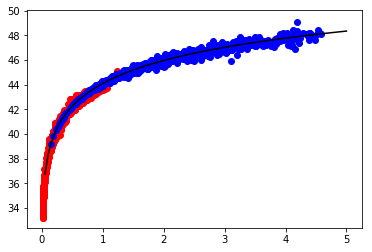

In [19]:
from matplotlib import pyplot as plt
from forecast_SN_GW import distance_modulus_th
plt.scatter(d_X['zcmb'].values, X_jla.T[:,0]+19.05, c='r')
plt.scatter(mu_sirens[:,0], mu_sirens[:,1], c='b')
z = np.linspace(0.,5,100)
plt.plot(z, distance_modulus_th(z,z), c='black')
# plt.xlim(-0.0,1)
plt.show()

# Confidence contour 

## LCDM

In [20]:
g_jla = get_hubblefit(X_jla.T, covX, d_X['zcmb'].values, d_X['zcmb'].values, S[:, 0], S[:, 1])
g_jla.fit(fix_omgK=False)
print g_jla.minuit.values#
print g_jla.minuit.errors
xl_jla,ylp_jla,ylm_jla = g_jla.compute_contour('omgM','omgK',nsigma=np.sqrt(2.28),nbinX=7)
xl2_jla,ylp2_jla,ylm2_jla = g_jla.compute_contour('omgM','omgK',nsigma=np.sqrt(6),nbinX=7)

FCN = 682.07252049 
 TOTAL NCALL = 221 
 NCALLS = 221 
 
 
 EDM = 2.44535951564e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,
2,alpha1,0.141001,0.00659336,0,0,,,
3,alpha2,-3.09994,0.0806627,0,0,,,
4,alpha3,-0.07045,0.0231115,0,0,,,
5,omgM,0.20019,0.109133,0,0,0.0,1.0,
6,omgK,0.238911,0.262485,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


{'alpha2': -3.0999376598888384, 'alpha3': -0.07044998400197605, 'alpha1': 0.1410006678201438, 'Mb': -19.038796748045165, 'w': -1.0, 'omgK': 0.23891107599412065, 'omgM': 0.20018968305325696}
{'alpha2': 0.08066266749987668, 'alpha3': 0.023111476136558715, 'alpha1': 0.006593363466401731, 'Mb': 0.025518390167745375, 'w': 1.0, 'omgK': 0.2624849144728136, 'omgM': 0.10913286834433983}


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.18709348 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 4.38845181955e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.236942,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.159735,0.0527601,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.177381261 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 8.41335641088e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.234487,0.0239191,0,0,0.0,1.0,
6,omgK,0.161223,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.494966639 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 1.58248019283e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.270544,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.0878678,0.0528559,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.466963931 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.29628718347e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.266479,0.0239711,0,0,0.0,1.0,
6,omgK,0.0891411,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.928776709 
 TOTAL NCALL = 17 
 NCALLS = 17 
 
 
 EDM = 3.37458716231e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.300072,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.0249649,0.0529358,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.877514451 
 TOTAL NCALL = 11 
 NCALLS = 11 
 
 
 EDM = 1.8472398643e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.294585,0.0240168,0,0,0.0,1.0,
6,omgK,0.0259414,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.400549388 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 2.26805851352e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.324292,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.0263667,0.0530015,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.32533036 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.06418390503e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.317634,0.0240541,0,0,0.0,1.0,
6,omgK,-0.0257966,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.822602315 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 2.50591259948e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.342407,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.0647643,0.0530443,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.726676698 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.73331968918e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.334869,0.0240819,0,0,0.0,1.0,
6,omgK,-0.0644295,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.129224583 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.58718947633e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.354187,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.0900726,0.0530573,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.018524357 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.60984075787e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.346076,0.0240999,0,0,0.0,1.0,
6,omgK,-0.0895235,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.294859682 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.25528898756e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.360178,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.102412,0.0530823,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.176354126 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.88894053237e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.351775,0.0241091,0,0,0.0,1.0,
6,omgK,-0.102277,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.347082897 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.65339862054e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.362019,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.106206,0.0530897,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.226116771 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.33329744538e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.353525,0.0241119,0,0,0.0,1.0,
6,omgK,-0.106194,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.176806923 
 TOTAL NCALL = 22 
 NCALLS = 22 
 
 
 EDM = 1.07839833184e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.164824,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.314938,0.0525387,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.175859864 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.33117867609e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.165826,0.0238074,0,0,0.0,1.0,
6,omgK,0.31646,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.464334509 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 5.09161880128e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.131437,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.387241,0.0524308,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.452918424 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 7.13587624099e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.134062,0.0237554,0,0,0.0,1.0,
6,omgK,0.388555,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.868086429 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 3.9604821958e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.101941,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.451322,0.052332,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.839583388 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.01759944331e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.106041,0.0237078,0,0,0.0,1.0,
6,omgK,0.452358,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.31097611 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 1.90279793897e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0773074,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.504987,0.0522473,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.262529406 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.74729352877e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0827146,0.0236631,0,0,0.0,1.0,
6,omgK,0.505716,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.720574921 
 TOTAL NCALL = 17 
 NCALLS = 17 
 
 
 EDM = 1.47013198239e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0581646,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.546777,0.0521799,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.652879614 
 TOTAL NCALL = 19 
 NCALLS = 19 
 
 
 EDM = 8.6003580363e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0643028,0.0236323,0,0,0.0,1.0,
6,omgK,0.547225,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.041247924 
 TOTAL NCALL = 19 
 NCALLS = 19 
 
 
 EDM = 1.69883042263e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0447521,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.576111,0.0521324,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.958255962 
 TOTAL NCALL = 14 
 NCALLS = 14 
 
 
 EDM = 5.44593681254e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0517133,0.0235942,0,0,0.0,1.0,
6,omgK,0.576331,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.243641723 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 1.57767203574e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0368276,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.593439,0.0521027,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.150780629 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 6.69249368488e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0439988,0.0235865,0,0,0.0,1.0,
6,omgK,0.593536,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.332753771 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.72446066244e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0334524,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.600739,0.0520845,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.235539295 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 8.77205991956e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0407873,0.0235779,0,0,0.0,1.0,
6,omgK,0.600866,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.351651113 
 TOTAL NCALL = 15 
 NCALLS = 15 
 
 
 EDM = 8.56194026846e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0327447,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.602398,0.0520889,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.253516766 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 9.28338882447e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0401139,0.023576,0,0,0.0,1.0,
6,omgK,0.602403,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.384379314 
 TOTAL NCALL = 18 
 NCALLS = 18 
 
 
 EDM = 5.65778889943e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.260694,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.1089,0.0528282,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.351148286 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.63195075563e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.255969,0.023954,0,0,0.0,1.0,
6,omgK,0.112805,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.213216341 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 1.47380999662e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.315306,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.00739194,0.0529755,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.124876742 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.17647860191e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.307943,0.0240382,0,0,0.0,1.0,
6,omgK,-0.00407041,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.380748738 
 TOTAL NCALL = 20 
 NCALLS = 20 
 
 
 EDM = 2.02224019783e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.363193,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.108675,0.0530927,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.225676529 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.08800167617e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.353491,0.0241112,0,0,0.0,1.0,
6,omgK,-0.106159,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 685.644871231 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 8.3034073534e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.402223,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.190571,0.0531841,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 685.423454214 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.74520668465e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.390593,0.0241696,0,0,0.0,1.0,
6,omgK,-0.189073,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 686.761183342 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 3.97826151999e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.43102,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.250931,0.0532381,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 686.484331197 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 2.1545088068e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.418174,0.0242203,0,0,0.0,1.0,
6,omgK,-0.250073,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.549769954 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 7.11885204615e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.449252,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.289418,0.0532577,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.235117565 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 4.36439218804e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.435542,0.0242489,0,0,0.0,1.0,
6,omgK,-0.288613,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.951862171 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.31299844699e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.458023,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.307296,0.0532844,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.618429446 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 6.01150468169e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.4439,0.0242626,0,0,0.0,1.0,
6,omgK,-0.307132,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 688.063633585 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 9.41615676732e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.460405,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.31217,0.0532908,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.725008832 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 6.54473597132e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.446169,0.0242663,0,0,0.0,1.0,
6,omgK,-0.312159,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 688.0724656 
 TOTAL NCALL = 15 
 NCALLS = 15 
 
 
 EDM = 1.37929472594e-17 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.460592,0.109133,0,0,0.0,1.0,FIXED
6,omgK,-0.312554,0.0532912,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.733431222 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 6.58836575651e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.446347,0.0242666,0,0,0.0,1.0,
6,omgK,-0.312554,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.337832456 
 TOTAL NCALL = 25 
 NCALLS = 25 
 
 
 EDM = 2.82603880251e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.143679,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.36068,0.0524698,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.342180992 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.00441581182e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.144561,0.0237726,0,0,0.0,1.0,
6,omgK,0.364682,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.077869836 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 1.0714850751e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0896096,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.47817,0.0522899,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.060667087 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 8.50468294878e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0931585,0.023685,0,0,0.0,1.0,
6,omgK,0.481653,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.116405017 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 1.93915836481e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0417654,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.582647,0.0521217,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.058870337 
 TOTAL NCALL = 14 
 NCALLS = 14 
 
 
 EDM = 3.54538852079e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0476952,0.0235855,0,0,0.0,1.0,
6,omgK,0.585421,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 685.258155524 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 2.17629209298e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.0016034,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.670718,0.0519743,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 685.150966454 
 TOTAL NCALL = 26 
 NCALLS = 26 
 
 
 EDM = 2.97447876914e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,0.00935223,0.0233449,0,0,0.0,1.0,
6,omgK,0.672702,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 686.323387985 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 1.35794259193e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,-0.0299414,0.109133,0,0,0.0,1.0,FIXED
6,omgK,0.740118,0.0518531,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 686.917675639 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 8.39333849662e-14 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0388,0.0255184,0,0,,,FIXED
2,alpha1,0.141001,0.00659336,0,0,,,FIXED
3,alpha2,-3.09994,0.0806627,0,0,,,FIXED
4,alpha3,-0.07045,0.0231115,0,0,,,FIXED
5,omgM,1.16573e-15,0.0138818,0,0,0.0,1.0,
6,omgK,0.741356,0.262485,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


In [21]:
z = np.concatenate((mu_sirens[:,0], d_X['zcmb'].values), axis=None)
sig_coh = np.concatenate((np.zeros(len(mu_sirens)), S[:, 0]), axis=None)
sig_lens = np.concatenate((np.zeros(len(mu_sirens)), S[:, 1]), axis=None)
g_combined = get_hubblefit(X_combined, cov_combined, z, z, sig_coh, sig_lens, sirens=sirens)
g_combined.fit(fix_omgK=False)
g_combined.minuit.values
g_combined.minuit.errors
xl_combined,ylp_combined,ylm_combined = g_combined.compute_contour('omgM','omgK',nsigma=np.sqrt(2.28),nbinX=7)
xl2_combined,ylp2_combined,ylm2_combined = g_combined.compute_contour('omgM','omgK',nsigma=np.sqrt(6),nbinX=7)

FCN = 1673.92109292 
 TOTAL NCALL = 205 
 NCALLS = 205 
 
 
 EDM = 2.00467124995e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,
2,alpha1,0.141284,0.00657274,0,0,,,
3,alpha2,-3.10243,0.0801529,0,0,,,
4,alpha3,-0.0698565,0.023098,0,0,,,
5,omgM,0.308964,0.0041939,0,0,0.0,1.0,
6,omgK,-0.0396234,0.0135158,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1674.50080862 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.9298961987e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.31215,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0485039,0.00675563,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1674.35179888 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.37024891686e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.311336,0.00210389,0,0,0.0,1.0,
6,omgK,-0.048433,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.49185244 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 9.94351223536e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.314206,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0541509,0.00675474,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.08978981 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.76405624472e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.312867,0.00210451,0,0,0.0,1.0,
6,omgK,-0.0541218,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.06950278 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.33250809159e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.315093,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0565773,0.00675434,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.51978074 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.32699036807e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.313527,0.00210478,0,0,0.0,1.0,
6,omgK,-0.0565719,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1674.48901175 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 1.15955629107e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.305799,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0308062,0.00675846,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1674.34910894 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.95962661639e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.306584,0.00210198,0,0,0.0,1.0,
6,omgK,-0.0307801,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.47172368 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.10743882256e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.303732,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.025038,0.00675906,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.08815251 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.44260938551e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.305029,0.00210136,0,0,0.0,1.0,
6,omgK,-0.0250075,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.05854734 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.33161524766e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.30282,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0224614,0.00675941,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.5296477 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.71677561729e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.304342,0.00210109,0,0,0.0,1.0,
6,omgK,-0.0224554,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.45324388 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 3.69148673868e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.314141,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0539499,0.00675488,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.05446377 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.73478184718e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.312808,0.00210449,0,0,0.0,1.0,
6,omgK,-0.0539016,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1678.0684584 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.67586969169e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.317474,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0631693,0.00675274,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.99567696 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.29654143655e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.315281,0.0021055,0,0,0.0,1.0,
6,omgK,-0.0630934,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1679.58249212 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.1393805379e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.318902,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0670362,0.00675208,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1678.11898137 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.44632087607e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.316338,0.00210593,0,0,0.0,1.0,
6,omgK,-0.0670225,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.4090301 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 1.97357868677e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.303839,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0253454,0.00675899,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.04738256 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.28409618231e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.305099,0.00210139,0,0,0.0,1.0,
6,omgK,-0.0252657,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1677.98777986 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 7.9065070173e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.300483,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0159474,0.00675974,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.99260215 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 9.37763743497e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.302567,0.00210039,0,0,0.0,1.0,
6,omgK,-0.0158661,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1679.53758869 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.2392036656e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.298992,0.0041939,0,0,0.0,1.0,FIXED
6,omgK,-0.0116958,0.00676029,0,0,-1.0,1.0,
7,w,-1,1,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1678.16246892 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.7615500339e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.051,0.0174827,0,0,,,FIXED
2,alpha1,0.141284,0.00657274,0,0,,,FIXED
3,alpha2,-3.10243,0.0801529,0,0,,,FIXED
4,alpha3,-0.0698565,0.023098,0,0,,,FIXED
5,omgM,0.30144,0.00209995,0,0,0.0,1.0,
6,omgK,-0.0116795,0.0135158,0,0,-1.0,1.0,FIXED
7,w,-1,1,0,0,,,FIXED


Text(0,0.5,'Omega L')

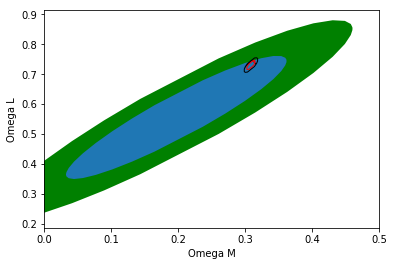

In [40]:
plt.fill_between(xl2_jla, 1-xl2_jla-ylm2_jla,1-xl2_jla-ylp2_jla, facecolor='green',linewidth=1)
plt.fill_between(xl_jla, 1-xl_jla-ylm_jla, 1-xl_jla-ylp_jla, linewidth=1)
plt.fill_between(xl2_combined,1-xl2_combined-ylm2_combined, 1-xl2_combined-ylp2_combined, linewidth=1,
                 facecolor="none", hatch="X",edgecolor="black")
plt.fill_between(xl_combined,1-xl_combined-ylm_combined, 1-xl_combined-ylp_combined, linewidth=1,
                 facecolor='None', hatch="X",edgecolor="r")
plt.xlim(0.,0.5)
plt.xlabel('Omega M')
plt.ylabel('Omega L')

Text(0,0.5,'Omega L')

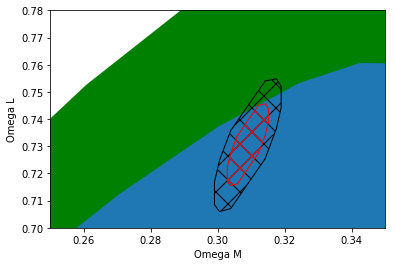

In [41]:
plt.fill_between(xl2_jla, 1-xl2_jla-ylm2_jla,1-xl2_jla-ylp2_jla, facecolor='green',linewidth=1)
plt.fill_between(xl_jla, 1-xl_jla-ylm_jla, 1-xl_jla-ylp_jla, linewidth=1)
plt.fill_between(xl2_combined,1-xl2_combined-ylm2_combined, 1-xl2_combined-ylp2_combined, linewidth=1,
                 facecolor="none", hatch="X",edgecolor="black")
plt.fill_between(xl_combined,1-xl_combined-ylm_combined, 1-xl_combined-ylp_combined, linewidth=1,
                 facecolor='None', hatch="X",edgecolor="r")
plt.xlim(0.25,0.35)
plt.ylim(0.7,0.78)
plt.xlabel('Omega M')
plt.ylabel('Omega L')

In [23]:
print g_jla.minuit.values#
print g_jla.minuit.errors

{'alpha2': -3.0999376598888384, 'alpha3': -0.07044998400197605, 'alpha1': 0.1410006678201438, 'Mb': -19.038796748045165, 'w': -1.0, 'omgK': 0.23891107599412065, 'omgM': 0.14367916657644084}
{'alpha2': 0.08066266749987668, 'alpha3': 0.023111476136558715, 'alpha1': 0.006593363466401731, 'Mb': 0.025518390167745375, 'w': 1.0, 'omgK': 0.2624849144728136, 'omgM': 0.10913286834433983}


## wCDM

In [24]:
g_jla = get_hubblefit(X_jla.T, covX, d_X['zcmb'].values, d_X['zcmb'].values, S[:, 0], S[:, 1])
g_jla.fit(fix_w=False)
g_jla.minuit.values#
g_jla.minuit.errors
xw_jla,ywp_jla,ywm_jla = g_jla.compute_contour('omgM','w',nsigma=np.sqrt(2.28),nbinX=7)
xw2_jla,ywp2_jla,ywm2_jla = g_jla.compute_contour('omgM','w',nsigma=np.sqrt(6),nbinX=7)

FCN = 682.181349316 
 TOTAL NCALL = 265 
 NCALLS = 265 
 
 
 EDM = 7.94756983095e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,
2,alpha1,0.140965,0.00659337,0,0,,,
3,alpha2,-3.09963,0.0806585,0,0,,,
4,alpha3,-0.0704922,0.0231107,0,0,,,
5,omgM,0.179416,0.154536,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.768429,0.239707,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.266582304 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 1.10505072211e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.222115,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.831294,0.0428571,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.265125961 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 7.42358115755e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.221038,0.0265049,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.831937,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.516078588 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 2.09793141432e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.261262,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.897715,0.0477411,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.506816605 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.17829439763e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.258776,0.0254387,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.898543,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.90084144 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 2.37065044624e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.295116,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.963601,0.0527818,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.876046268 
 TOTAL NCALL = 11 
 NCALLS = 11 
 
 
 EDM = 2.76581788876e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.291223,0.0245132,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.9645,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.357529681 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 1.54618682782e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.322678,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.02422,0.0575938,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.310300274 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.03346593863e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.317472,0.0237585,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.02503,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.801588061 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 5.23612544082e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.34338,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.0746,0.061721,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.728907749 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.58501727115e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.337069,0.0231917,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.07517,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.153047172 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 7.34074138907e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.357193,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.11084,0.0647622,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.057828929 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.49931018322e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.350077,0.0228138,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.11113,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.365695485 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.5955446726e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.364745,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.13136,0.0665224,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.255825044 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.24199920554e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.357163,0.0226074,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.13171,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.447999044 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.26529447715e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.367532,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.13943,0.0672063,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.332277419 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.05889714505e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.359773,0.0225313,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.13948,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.46102143 
 TOTAL NCALL = 15 
 NCALLS = 15 
 
 
 EDM = 1.40802786629e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.367966,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.1407,0.0673141,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.3443618 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.19600840304e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.360179,0.0225194,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.1407,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.240467845 
 TOTAL NCALL = 18 
 NCALLS = 18 
 
 
 EDM = 1.19684317768e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.138466,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.716225,0.0348603,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.23825393 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.1081531049e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.139839,0.0287597,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.716472,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.402573015 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 6.17648370742e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.0979863,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.67066,0.0318542,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.396386742 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 8.69249853628e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.100363,0.0298315,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.670762,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.636865831 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.39538339191e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.0584801,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.631078,0.0293212,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.626036061 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.22453059311e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.0618029,0.0308445,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.631155,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.913769254 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.55314753306e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.0208173,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.59745,0.0272089,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.898237884 
 TOTAL NCALL = 14 
 NCALLS = 14 
 
 
 EDM = 1.66305105926e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.0249186,0.0316798,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.597306,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.20716762 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.31470598682e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,-0.0142002,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.569032,0.0254661,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.271140496 
 TOTAL NCALL = 11 
 NCALLS = 11 
 
 
 EDM = 3.41497814129e-13 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,1.95954e-14,0.0562249,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.568784,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/cosmo_tools.py:19: RuntimeWarning: invalid value encountered in sqrt
  return 1./np.sqrt(omgM*(1+z)**3 + (1-omgM-omgK)*(1+z)**(3*(1+w)) + omgK*(1+z)**2)
/home/florian/forecast_SN_GW/forecast_SN_GW/cosmo_tools.py:30: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integr[i]=integrate.quad(int_cosmo, 0, zcmb[i], args=(omgM, omgK, w))[0]
/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.423643556 
 TOTAL NCALL = 17 
 NCALLS = 17 
 
 
 EDM = 1.28102922558e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.249834,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.877388,0.0462225,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 682.42289527 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.38821306116e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.248502,0.02573,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.879423,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.173313109 
 TOTAL NCALL = 17 
 NCALLS = 17 
 
 
 EDM = 6.38004645507e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.312566,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.00124,0.0557469,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.152307713 
 TOTAL NCALL = 11 
 NCALLS = 11 
 
 
 EDM = 6.06403525203e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.308831,0.0240078,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.0043,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.357163427 
 TOTAL NCALL = 17 
 NCALLS = 17 
 
 
 EDM = 1.09800018926e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.364453,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.13078,0.0664628,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 684.282431028 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.61711220639e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.358095,0.0225813,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.13443,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 685.736680973 
 TOTAL NCALL = 17 
 NCALLS = 17 
 
 
 EDM = 6.21918789029e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.403952,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.25196,0.0771978,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 685.571248856 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.93730070347e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.395014,0.0215001,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.25525,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 686.971650025 
 TOTAL NCALL = 17 
 NCALLS = 17 
 
 
 EDM = 9.1296499403e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.430602,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.34806,0.086204,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 686.699874058 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.44645898546e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.419513,0.0207765,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.35012,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.783708505 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 8.4325289523e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.445379,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.40728,0.0919759,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.428651555 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 4.01418648492e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.433139,0.0203865,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.40814,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 688.120579905 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.49640917946e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.451021,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.43091,0.0943346,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.7278281 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 5.82835676078e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.438241,0.0202363,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.4314,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 688.179541666 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.31505219874e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.451983,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.43541,0.094773,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 687.780014467 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 6.20889938731e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.439108,0.0202107,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.43543,0.239707,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.084584165 
 TOTAL NCALL = 18 
 NCALLS = 18 
 
 
 EDM = 3.11621718261e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0,0.154536,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.580233,0.0261494,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 683.067933922 
 TOTAL NCALL = 28 
 NCALLS = 28 
 
 
 EDM = 1.08735547548e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0381,0.0256987,0,0,,,FIXED
2,alpha1,0.140965,0.00659337,0,0,,,FIXED
3,alpha2,-3.09963,0.0806585,0,0,,,FIXED
4,alpha3,-0.0704922,0.0231107,0,0,,,FIXED
5,omgM,0.00418526,0.0614426,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-0.579885,0.239707,0,0,,,FIXED


In [25]:
z = np.concatenate((mu_sirens[:,0], d_X['zcmb'].values), axis=None)
sig_coh = np.concatenate((np.zeros(len(mu_sirens)), S[:, 0]), axis=None)
sig_lens = np.concatenate((np.zeros(len(mu_sirens)), S[:, 1]), axis=None)
g_combined = get_hubblefit(X_combined, cov_combined, z, z, sig_coh, sig_lens, sirens=sirens)
g_combined.fit(fix_w=False)
g_combined.minuit.values
g_combined.minuit.errors

xw_combined,ywp_combined,ywm_combined = g_combined.compute_contour('omgM','w',nsigma=np.sqrt(2.28),nbinX=7)
xw2_combined,ywp2_combined,ywm2_combined = g_combined.compute_contour('omgM','w',nsigma=np.sqrt(6),nbinX=7)

FCN = 1674.8529715 
 TOTAL NCALL = 220 
 NCALLS = 220 
 
 
 EDM = 2.07635158544e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,
2,alpha1,0.141303,0.00657284,0,0,,,
3,alpha2,-3.10235,0.0801576,0,0,,,
4,alpha3,-0.0698158,0.023098,0,0,,,
5,omgM,0.316264,0.00671658,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.06198,0.023335,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.0715816 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 2.82219941309e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.319392,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.07238,0.00726819,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.05207881 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.05031709331e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.319104,0.00205995,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.07242,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.61531958 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 1.18590245881e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.322084,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.08146,0.00736576,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.54363953 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.61108882792e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.321533,0.00205536,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.08149,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.25290884 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.63843235723e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.324131,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.0884,0.00744084,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.1182294 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.00877779441e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.323377,0.00205188,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.08847,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.76706234 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 8.17745167381e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.325449,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.09297,0.00749025,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.58075771 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.88066920598e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.324562,0.00204963,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.093,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.06705461 
 TOTAL NCALL = 19 
 NCALLS = 19 
 
 
 EDM = 5.52313717841e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.313155,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.05181,0.00704927,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.04556777 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.71077206356e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.313459,0.00207057,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.05185,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.5896956 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 1.12275458989e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.310476,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.04318,0.00695818,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.51920654 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.001927634e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.311026,0.00207512,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.0432,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.20707572 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.6033148709e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.308397,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.03651,0.00688833,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.08025568 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.59475297802e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.309136,0.00207865,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.03658,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.72118637 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 8.91655072173e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.307008,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.03216,0.00684266,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.54833241 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.93449792514e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.307871,0.00208101,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.03218,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.4335001 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 5.20926497365e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.321348,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.07896,0.00733884,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.38380079 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.69981100327e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.320888,0.00205658,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.07907,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.88298327 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 2.24583471041e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.32572,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.09393,0.00750056,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.69323633 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.03725736353e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.324825,0.00204913,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.09401,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1678.57725377 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 4.5537220636e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.329022,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.10547,0.00762619,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1678.21598629 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.49363281866e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.32779,0.0020435,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.10552,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1679.92840883 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 5.46587067276e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.331121,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.11285,0.00770719,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1679.42639772 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.92079697454e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.32967,0.00203992,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.11293,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:399: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1680.64419358 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.84388736807e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.332116,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.11645,0.00774659,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:412: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1680.06653913 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.89147465083e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.33056,0.00203822,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.11647,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.41132116 
 TOTAL NCALL = 18 
 NCALLS = 18 
 
 
 EDM = 1.0002130986e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.31123,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.0456,0.00698363,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1675.3534158 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.41094834663e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.311729,0.00207381,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.04569,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.76925328 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 1.9616248586e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.306888,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.0318,0.0068389,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1676.5849969 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 3.33530981778e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.30778,0.00208118,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.03187,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1678.37743196 
 TOTAL NCALL = 16 
 NCALLS = 16 
 
 
 EDM = 4.04905176204e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.303499,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.02124,0.0067289,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1678.05013512 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.02432507726e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.30469,0.00208693,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.02128,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1679.7298345 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.32511228519e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.30121,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.01416,0.00665568,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1679.28552323 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 1.85226138997e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.302599,0.00209081,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.01423,0.023335,0,0,,,FIXED


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:464: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1680.53614514 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 4.91775888882e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.29999,0.00671658,0,0,0.0,1.0,FIXED
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.01048,0.00661762,0,0,,,


/home/florian/forecast_SN_GW/forecast_SN_GW/Hubble_fit.py:477: InitialParamWarning: errordef is not given. Default to 1.
  m = minuit.Minuit(self.minuit.fcn,**marg)


FCN = 1680.02328771 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 2.44365566511e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,Mb,-19.0517,0.0175126,0,0,,,FIXED
2,alpha1,0.141303,0.00657284,0,0,,,FIXED
3,alpha2,-3.10235,0.0801576,0,0,,,FIXED
4,alpha3,-0.0698158,0.023098,0,0,,,FIXED
5,omgM,0.301484,0.00209288,0,0,0.0,1.0,
6,omgK,0,1,0,0,-1.0,1.0,FIXED
7,w,-1.0105,0.023335,0,0,,,FIXED


Text(0,0.5,'w')

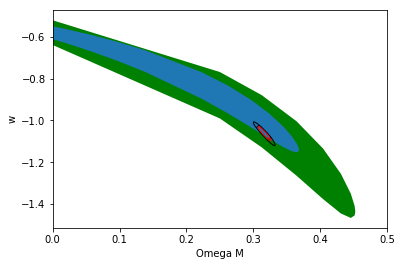

In [43]:

plt.fill_between(xw2_jla,ywm2_jla,ywp2_jla, facecolor='green',linewidth=1)
plt.fill_between(xw_jla,ywm_jla,ywp_jla, linewidth=1)
plt.fill_between(xw2_combined, ywm2_combined, ywp2_combined, linewidth=1,
                 facecolor="none", hatch="X",edgecolor="black")
plt.fill_between(xw_combined, ywm_combined, ywp_combined, linewidth=1,
                 facecolor='None', hatch="X",edgecolor="r")
plt.xlim(0.,0.5)
plt.xlabel('Omega M')
plt.ylabel('w')

Text(0,0.5,'w')

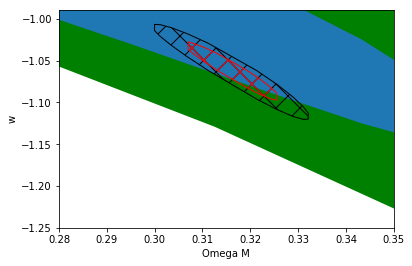

In [42]:

plt.fill_between(xw2_jla,ywm2_jla,ywp2_jla, facecolor='green',linewidth=1)
plt.fill_between(xw_jla,ywm_jla,ywp_jla, linewidth=1)
plt.fill_between(xw2_combined, ywm2_combined, ywp2_combined, linewidth=1,
                 facecolor="none", hatch="X",edgecolor="black")
plt.fill_between(xw_combined, ywm_combined, ywp_combined, linewidth=1,
                 facecolor='None', hatch="X",edgecolor="r")
plt.xlim(0.28,0.35)
plt.ylim(-1.25,-0.99)
plt.xlabel('Omega M')
plt.ylabel('w')